In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [136]:
df = pd.read_csv('/kaggle/input/used-car-price-prediction-dataset/used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [137]:
df.shape

(4009, 12)

In [138]:
df.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [140]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

# Handling missing values

In [141]:
df['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [142]:
# df['clean_title'].fillna('No', inplace=True)
# df
df.fillna({'clean_title': 'No'}, inplace = True)
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,No,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [143]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', nan, 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [144]:
df.fillna({'fuel_type': '–'}, inplace = True)

In [145]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,"$34,999"


In [146]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type         0
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title       0
price             0
dtype: int64

In [147]:
df['accident'].unique()

array(['At least 1 accident or damage reported', 'None reported', nan],
      dtype=object)

In [148]:
df.fillna({'accident': 'unknown'}, inplace = True)

In [149]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,"$34,999"


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     4009 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      4009 non-null   object
 10  clean_title   4009 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [151]:
#df['milage'].unique()
new_df = df.copy()
new_df['milage(mi)'] = new_df['milage'].apply(lambda x: int(x.split(' ',1)[0].replace(',','')))
new_df['price($)'] = new_df['price'].apply(lambda x: int(x.replace(',','').replace('$','')))
new_df = new_df.drop(['milage','price'], axis = 1)
new_df

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,milage(mi),price($)
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,51000,10300
1,Hyundai,Palisade SEL,2021,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,34742,38005
2,Lexus,RX 350 RX 350,2022,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,22372,54598
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,88900,15500
4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,9835,34999
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,714,349950
4005,Audi,S4 3.0T Premium Plus,2022,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,10900,53900
4006,Porsche,Taycan,2022,–,Electric,Automatic,Black,Black,None reported,No,2116,90998
4007,Ford,F-150 Raptor,2020,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,33000,62999


In [152]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   fuel_type     4009 non-null   object
 4   engine        4009 non-null   object
 5   transmission  4009 non-null   object
 6   ext_col       4009 non-null   object
 7   int_col       4009 non-null   object
 8   accident      4009 non-null   object
 9   clean_title   4009 non-null   object
 10  milage(mi)    4009 non-null   int64 
 11  price($)      4009 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 376.0+ KB


In [153]:
np.sort(new_df['model_year'].unique())

array([1974, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024])

In [154]:
new_df.corr(numeric_only = True)

,model_year,milage(mi),price($)
model_year,1.000000,-0.617720,0.199496
milage(mi),-0.617720,1.000000,-0.305528
price($),0.199496,-0.305528,1.000000


In [155]:
# Checking duplicates
new_df.duplicated().sum()

0

# EDA

### Brand

In [156]:
new_df['brand'].unique()

array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Tesla', 'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar',
       'Mercedes-Benz', 'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia',
       'Jeep', 'Bentley', 'Honda', 'Lucid', 'MINI', 'Porsche', 'Hummer',
       'Chrysler', 'Volvo', 'Cadillac', 'Lamborghini', 'Maserati',
       'Volkswagen', 'Subaru', 'Rivian', 'GMC', 'RAM', 'Alfa', 'Ferrari',
       'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Bugatti', 'Polestar',
       'Rolls-Royce', 'McLaren', 'Buick', 'Lotus', 'Pontiac', 'FIAT',
       'Karma', 'Saab', 'Mercury', 'Plymouth', 'smart', 'Maybach',
       'Suzuki'], dtype=object)

In [157]:
new_df.groupby('brand')['price($)'].max()

brand
Acura             143900
Alfa               75900
Aston             279950
Audi              187900
BMW               145000
Bentley           349950
Bugatti          1950995
Buick              42442
Cadillac          479995
Chevrolet         179000
Chrysler           36800
Dodge             489995
FIAT               22500
Ferrari           469900
Ford              429998
GMC               146000
Genesis            60000
Honda              62000
Hummer             55000
Hyundai            55000
INFINITI           78990
Jaguar             74900
Jeep               84620
Karma              55500
Kia                50998
Lamborghini       749950
Land              199998
Lexus             159000
Lincoln            79999
Lotus              69250
Lucid             119999
MINI               30000
Maserati         2954083
Maybach            64250
Mazda              52991
McLaren           324995
Mercedes-Benz     425000
Mercury            23000
Mitsubishi         57000
Nissan            1

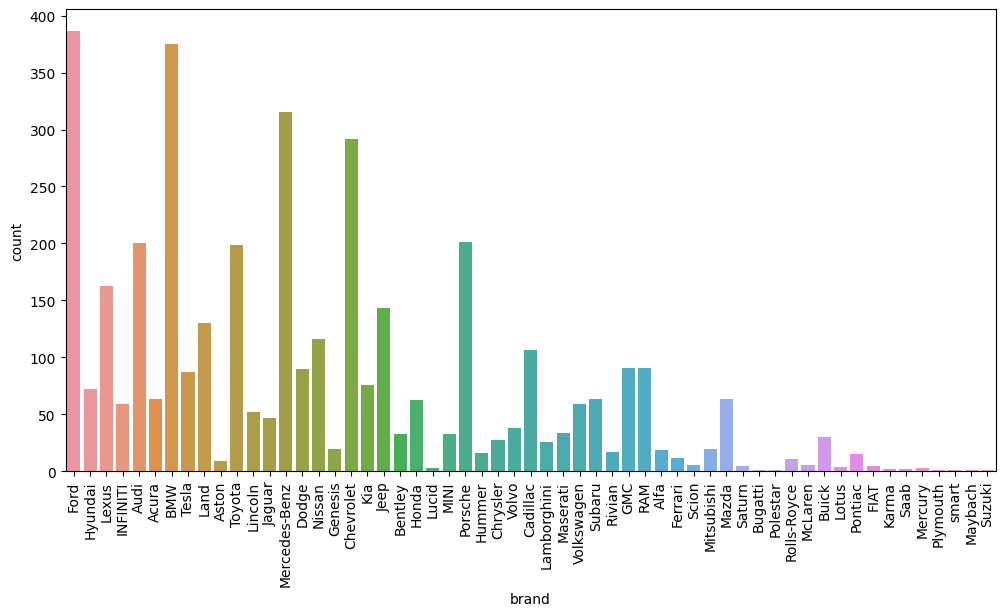

In [158]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'brand', data = new_df)
plt.xticks(rotation=90)
plt.show()

#### **Most of the car brands are Ford and BMW.**

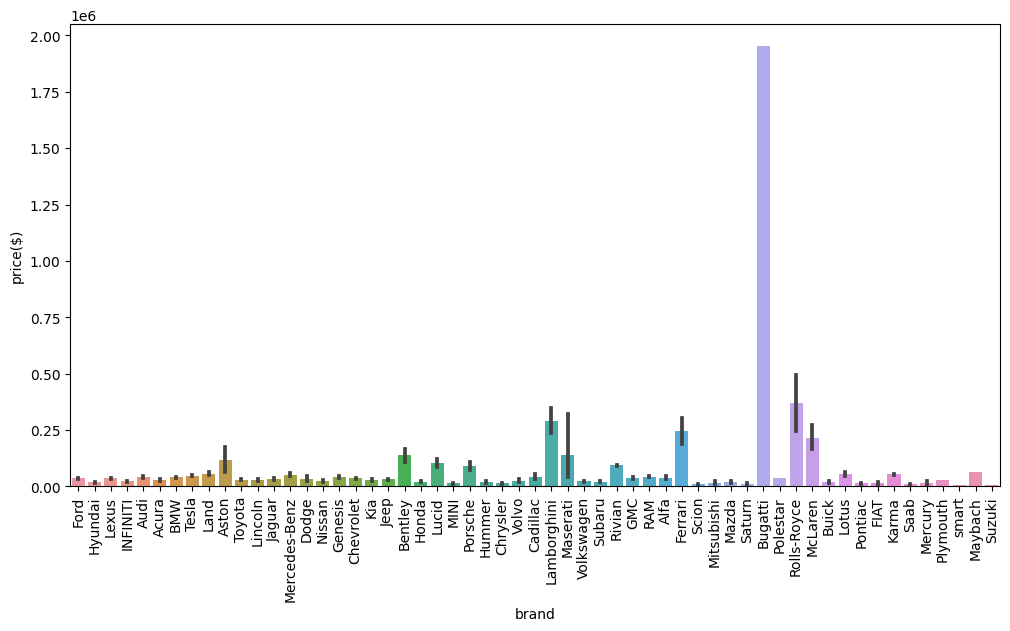

In [159]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'brand', y = 'price($)', data = new_df)
plt.xticks(rotation=90)
plt.show()

#### **Bugatti has the highest price on average.**

In [160]:
new_df[new_df['brand'] == 'Bugatti']

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,milage(mi),price($)
229,Bugatti,Veyron 16.4 Grand Sport,2011,Gasoline,8.0L W16 64V GDI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,White,White,None reported,Yes,6330,1950995


In [161]:
new_df['price($)'].max()

2954083

In [162]:
new_df['price($)'].min()

2000

<Axes: xlabel='price($)'>

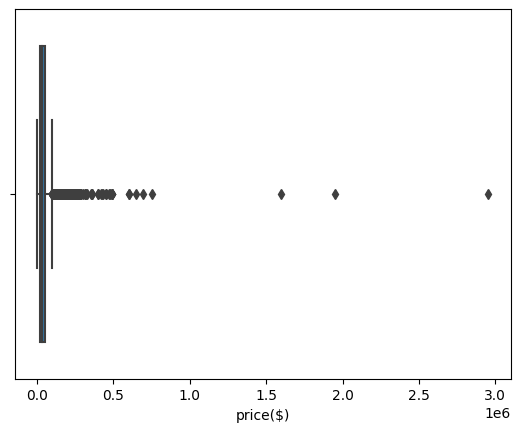

In [163]:
sns.boxplot(x = 'price($)', data = new_df)

#### There are too many outliers in price column.

In [164]:
new_df.groupby('brand')['model'].nunique().sum()

1899

### Clean Title

In [165]:
new_df['clean_title'].value_counts()

clean_title
Yes    3413
No      596
Name: count, dtype: int64

<Axes: xlabel='clean_title', ylabel='count'>

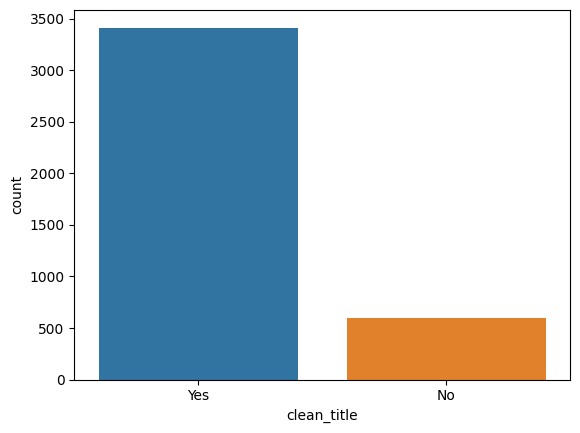

In [166]:
sns.countplot(x = 'clean_title', data = new_df)

<Axes: xlabel='clean_title', ylabel='price($)'>

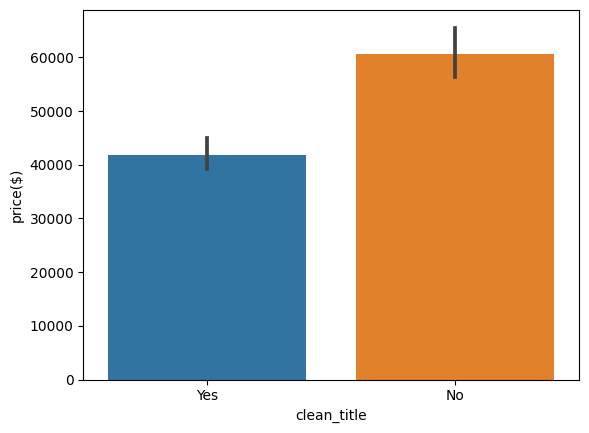

In [167]:
sns.barplot(x = 'clean_title', y = 'price($)', data = new_df)

In [168]:
new_df.groupby('clean_title')['price($)'].mean()

clean_title
No     60695.077181
Yes    41734.390272
Name: price($), dtype: float64

<Axes: xlabel='clean_title', ylabel='price($)'>

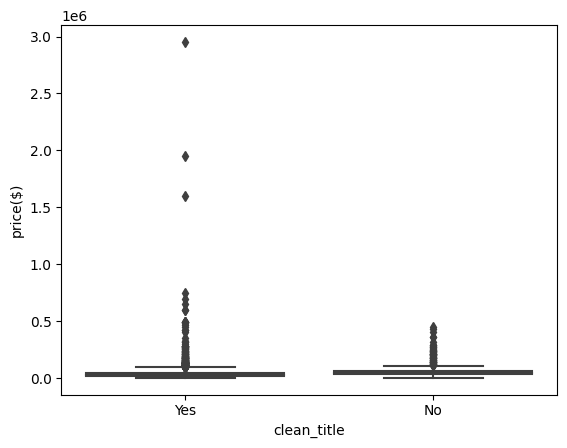

In [169]:
sns.boxplot(x = 'clean_title', y = 'price($)', data = new_df)

In [170]:
new_df['clean_title'].describe()

count     4009
unique       2
top        Yes
freq      3413
Name: clean_title, dtype: object

#### Accident

([<matplotlib.patches.Wedge at 0x7c3cffe54050>,
 [Text(-0.7166679422121849, 0.8344980890363696, 'None reported'),
  Text(0.756435810155647, -1.0572629120110904, 'At least 1 accident or damage reported'),
  Text(1.2949065195109628, -0.11496567195473861, 'unknown')],
 [Text(-0.3909097866611917, 0.4551807758380197, '72.6%'),
  Text(0.46549896009578273, -0.6506233304683632, '24.6%'),
  Text(0.7968655504682847, -0.07074810581830068, '2.8%')])

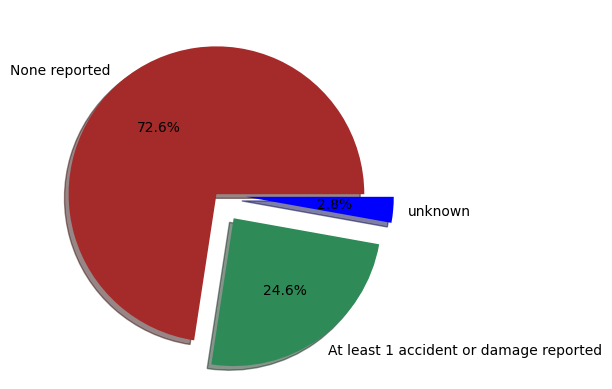

In [171]:
colors = ['brown', 'seagreen', 'blue']
plt.pie(new_df['accident'].value_counts(), labels = new_df['accident'].value_counts().index, colors = colors, autopct = '%0.1f%%', shadow = True, explode = [0,0.2,0.2])

#### Most of the cars have no accident reported.

<Axes: xlabel='price($)', ylabel='accident'>

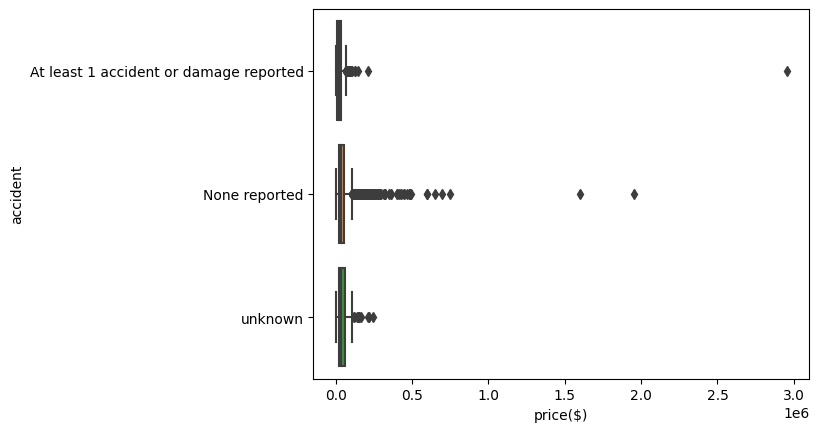

In [172]:
sns.boxplot(x = 'price($)', y = 'accident', data = new_df)

#### Transmission

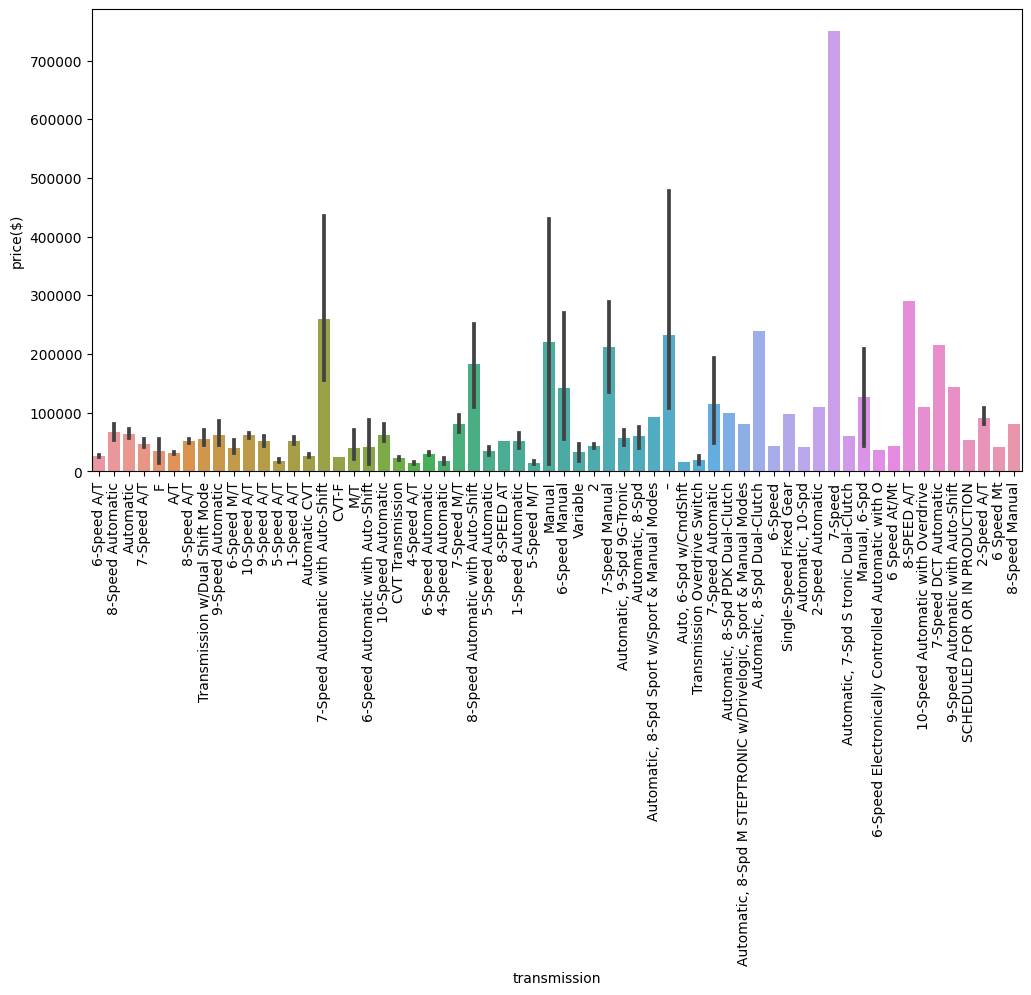

In [173]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'transmission', y = 'price($)', data = new_df)
plt.xticks(rotation = 90)
plt.show()

#### 7-speed car has greater price.

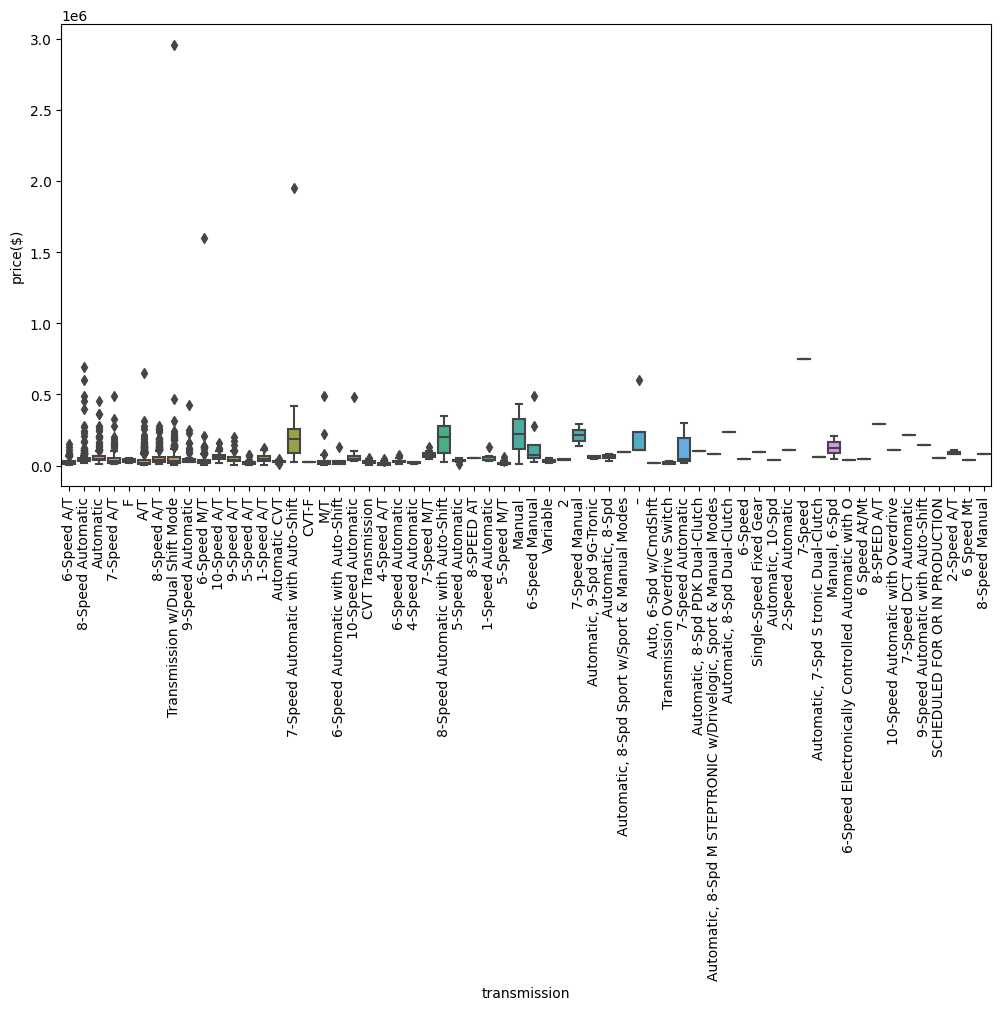

In [174]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'price($)', x = 'transmission', data = new_df)
plt.xticks(rotation=90)
plt.show()

#### Model Year

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='model_year', ylabel='price($)'>

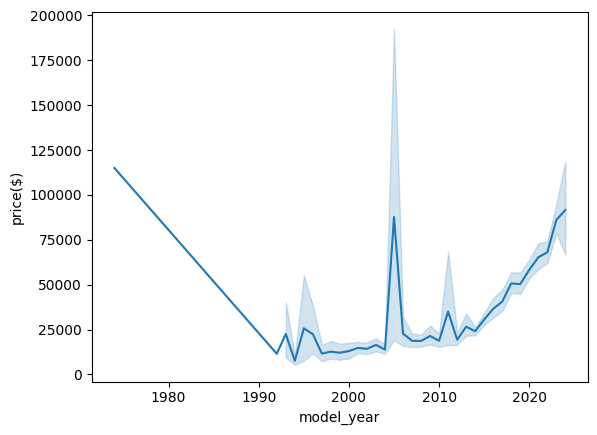

In [175]:
sns.lineplot(x = 'model_year', y = 'price($)', data = new_df)

#### The price is much higher for the model produced in year 2020.

<Axes: xlabel='model_year', ylabel='price($)'>

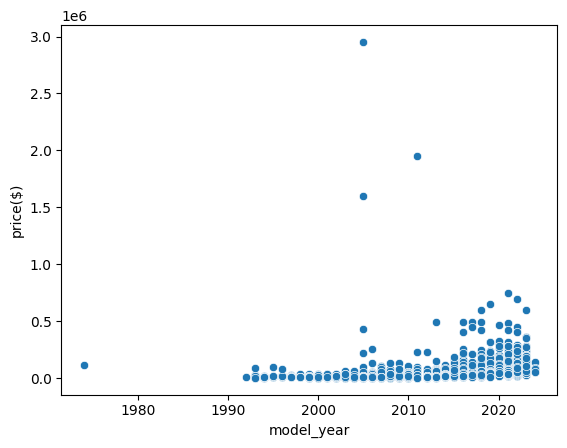

In [176]:
sns.scatterplot(x = 'model_year', y ='price($)', data = new_df)

#### Car models are produced in 2020.

In [177]:
# pivot_table = new_df.pivot_table(values='price($)', 
#                              index='accident', 
#                              columns='clean_title', 
#                              aggfunc='mean')
# print(pivot_table)


In [178]:
# pivot_table = new_df.pivot_table(values='price($)', 
#                              index='accident', 
#                              columns='clean_title', 
#                              aggfunc='mean')

# sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
# plt.title("Average Price by Accident & Clean Title")
# plt.show()


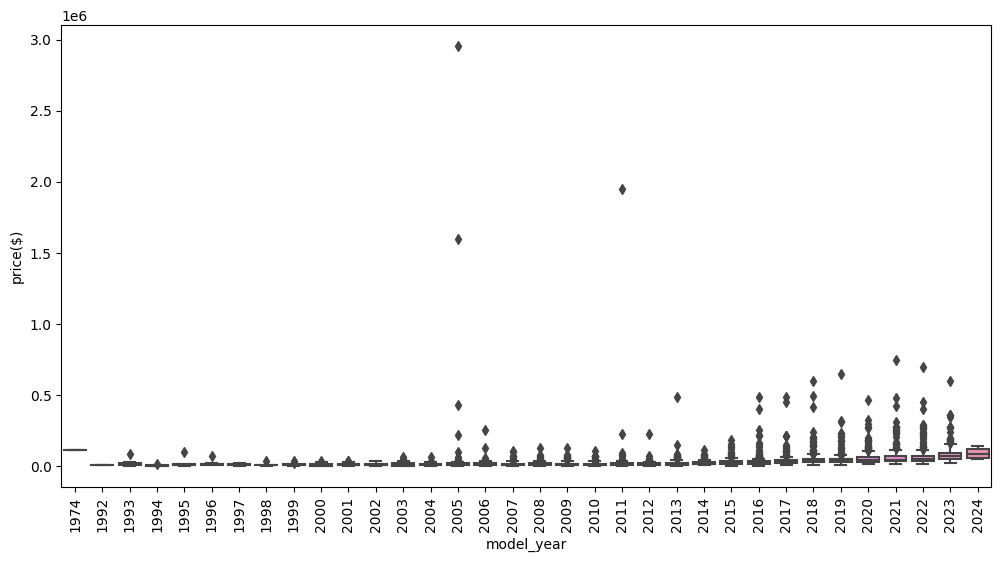

In [179]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'model_year', y ='price($)', data = new_df)
plt.xticks(rotation = 90)
plt.show()

In [180]:
new_df.corr(numeric_only = True)

,model_year,milage(mi),price($)
model_year,1.000000,-0.617720,0.199496
milage(mi),-0.617720,1.000000,-0.305528
price($),0.199496,-0.305528,1.000000


#### Milage

In [181]:
new_df['milage(mi)'].unique()

array([51000, 34742, 22372, ..., 53705,   714,  2116])

<Axes: xlabel='milage(mi)', ylabel='price($)'>

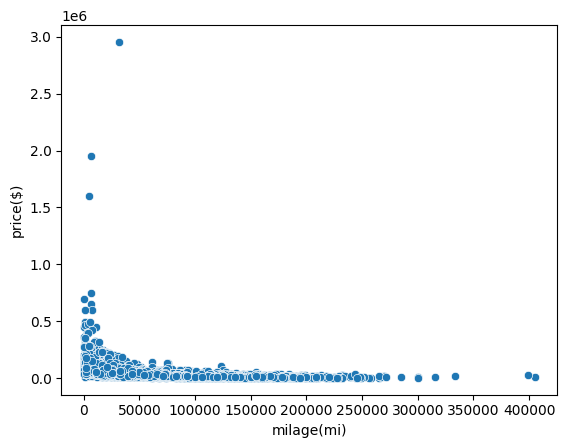

In [182]:
sns.scatterplot(x = 'milage(mi)',  y = 'price($)',data = new_df)

#### Milage mostly from 0 to 10000

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='milage(mi)', ylabel='Count'>

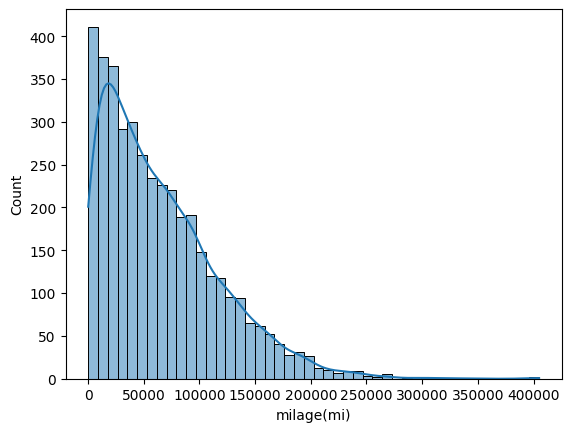

In [183]:
sns.histplot(x = 'milage(mi)', data = new_df, kde = True)

#### Price

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price($)', ylabel='Count'>

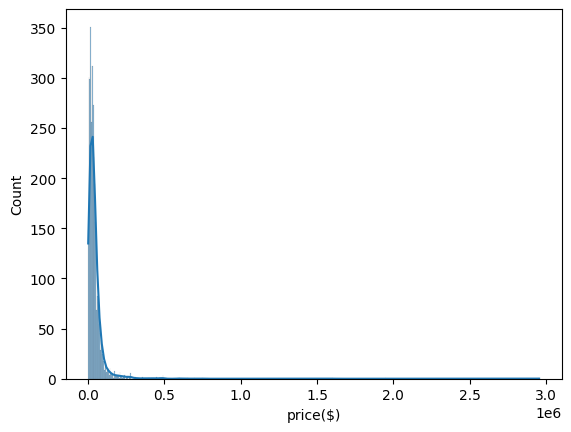

In [184]:
sns.histplot(x = 'price($)', kde = True, data = new_df)

#### Ext Color

In [185]:
# top_colors = new_df['ext_col'].value_counts().head(10).index
# df_filtered = new_df[new_df['ext_col'].isin(top_colors)]

# plt.figure(figsize=(12, 6))
# sns.boxplot(x='ext_col', y='price($)', data=df_filtered)
# plt.xticks(rotation=90)
# plt.show()

In [186]:
new_df['ext_col'].nunique()

319

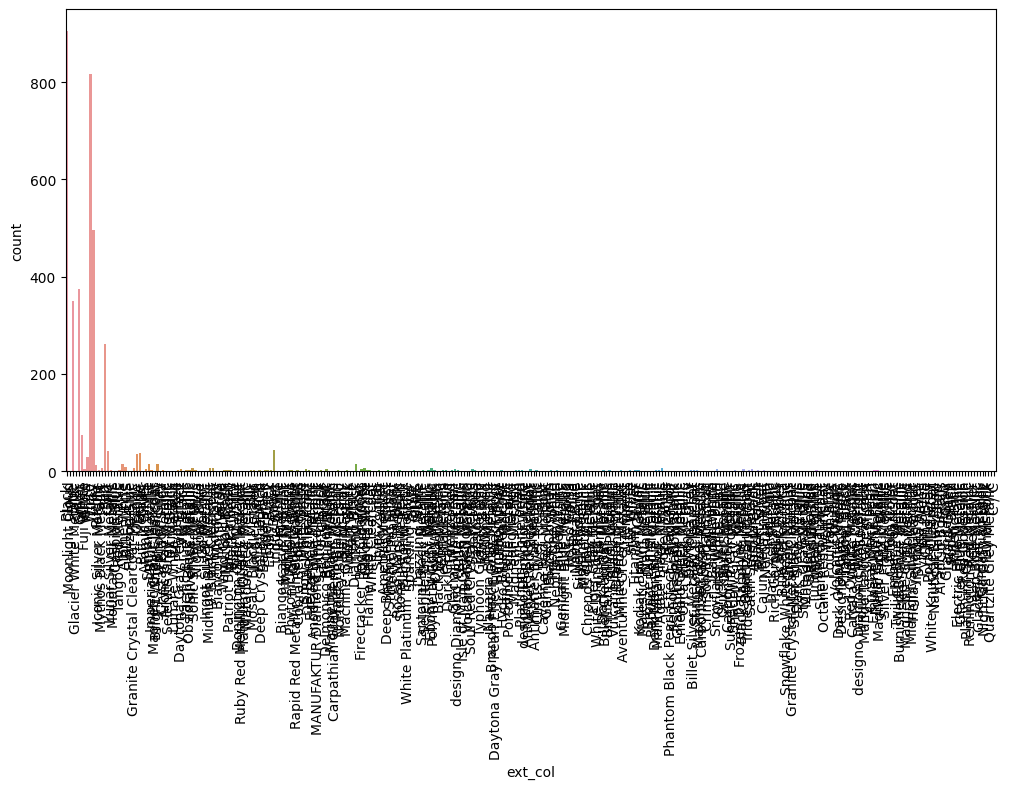

In [187]:
plt.figure(figsize=(12, 6))
sns.countplot(x='ext_col', data=new_df)
plt.xticks(rotation=90)
plt.show()

In [188]:
new_df['int_col'].nunique()

156

#### Fuel Types

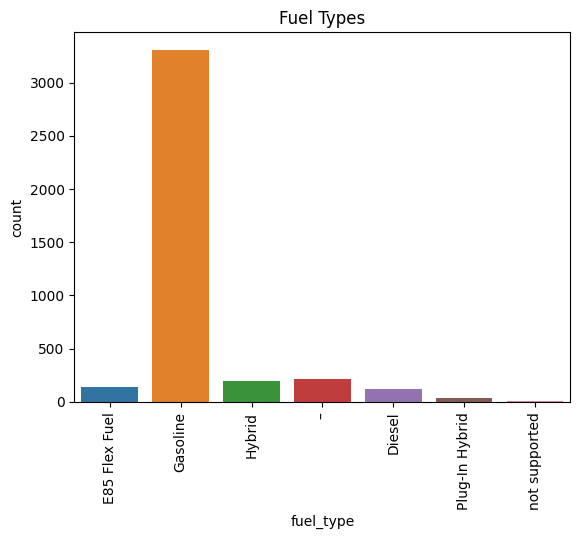

In [189]:
sns.countplot(x = 'fuel_type', data = new_df)
plt.title('Fuel Types')
plt.xticks(rotation = 90)
plt.show()

In [190]:
new_df['fuel_type'].unique() 

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', '–', 'Diesel',
       'Plug-In Hybrid', 'not supported'], dtype=object)

In [191]:
# # Handling Outliers
# Q1 = new_df['price($)'].quantile(0.25)
# Q3 = new_df['price($)'].quantile(0.75)

# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# new_df = new_df[((new_df['price($)'] >= lower_bound) & (new_df['price($)'] <= upper_bound))]

In [192]:
new_df['price($)'] = np.log1p(new_df['price($)'])

In [193]:
new_df = new_df.drop(['ext_col','int_col','model'], axis = 1)

In [194]:
# X = new_df.drop('price($)', axis = 1)

In [195]:
# y = new_df['price($)']

In [196]:
# encoded_value = pd.get_dummies(X)

In [197]:
# from sklearn.feature_selection import mutual_info_regression

# importances = mutual_info_regression(X, y)

# feat_importances = pd.Series(importances, index = X.columns)

# plt.figure(figsize = (12,6))
# feat_importances.sort_values().plot(kind='barh')
# plt.xlabel('Mutual Information Score')
# plt.ylabel('Features')
# plt.title('Feature importance using mutual information(Regression)')
# plt.grid(True)
# plt.show()

In [198]:
X = new_df.drop('price($)', axis=1)
y = new_df['price($)']

In [199]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [200]:
# from sklearn.feature_selection import mutual_info_regression
# importances = mutual_info_regression(X_encoded, y)

# feat_importances = pd.Series(importances, index=X_encoded.columns)

# plt.figure(figsize=(12,6))
# feat_importances.sort_values().plot(kind='barh')
# plt.xlabel('Mutual Information Score')
# plt.ylabel('Features')
# plt.title('Feature importance using Mutual Information (Regression)')
# plt.grid(True)
# plt.show()

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

In [202]:
# encoded_X_train = pd.get_dummies(X_train)

In [203]:
# encoded_X_train.head()

In [204]:
# encoded_X_test = pd.get_dummies(X_test)

In [205]:
# encoded_X_test = encoded_X_test.reindex(columns=encoded_X_train.columns, fill_value=0)
# encoded_X_test = encoded_X_test[encoded_X_train.columns]

In [206]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [207]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### Linear Regression

In [208]:
from sklearn import linear_model, metrics

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [209]:
print(model.intercept_)

10.30331700482972


In [210]:
print(model.coef_)

[ 0.30194155 -0.24744225 -0.00428398 ...  0.0141449   0.01916504
  0.0255127 ]


In [211]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: ", metrics.r2_score(y_test,y_pred))

Mean Absolute Error:  791994593165.0413
Mean Squared Error:  4.75684150998829e+25
Root Mean Squared Error:  6896985943140.88
R2 Score:  -6.108837284958104e+25


### KNN 

In [212]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors = 50)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [213]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.6000145363546436
Mean Squared Error: 0.6637408189767411
Root Mean Squared Error: 0.8147029022758794
R2 Score: 0.14760988904090577


### Random Forest 

In [214]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [215]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  0.21079450321650328
Mean Squared Error:  0.21079450321650328
Root Mean Squared Error:  0.4591236251996877
R2 Score:  0.7292932047432528


### Decision Tree

In [219]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state = 0)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [220]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  0.38224575067534683
Mean Squared Error:  0.3077283155909377
Root Mean Squared Error:  0.5547326523569148
R2 Score:  0.604808736222977


#### SVM 

In [222]:
from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [223]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  0.28916025805157347
Mean Squared Error:  0.24146871194956032
Root Mean Squared Error:  0.49139466007432386
R2 Score:  0.6899007319014263


#### XGBoost

In [225]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators = 100, random_state = 0)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [226]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  0.29441025666940024
Mean Squared Error:  0.19203491615918847
Root Mean Squared Error:  0.4382178866262632
R2 Score:  0.7533846664044221
